In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from utils.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ACN', 'ADBE', 'ADYEY', 'AMD', 'AMGN',
    'AMZN', 'ANET', 'ASML', 'AXON', 'BYND', 'CHWY', 'CRWD',
    'DDOG', 'DGX', 'DIS', 'DOCS', 'DOCU', 'EDIT', 'ETSY',
    'FLGT', 'FTNT', 'GH', 'GMED', 'GOOG', 'IDXX', 'ISRG',
    'JD', 'KNSL', 'LRCX', 'LSPD', 'LULU', 'MA', 'MASI', 'MDB',
    'MELI', 'MNST', 'MSFT', 'MTCH', 'NET', 'NOW', 'NVCR', 'NVDA',
    'ODFL', 'OKTA', 'OPEN', 'PAC', 'PANW', 'PAYC', 'PINS', 'PTON',
    'PYPL', 'QDEL', 'RBLX', 'RDFN', 'RGEN', 'RIVN', 'RMD', 'ROKU',
    'RVLV', 'SAM', 'SBUX', 'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC',
    'TEAM', 'TMUS', 'TREX', 'TSCO', 'TSLA', 'TTC', 'TTD', 'TTWO',
    'TWLO', 'TYL', 'UPST', 'VEEV', 'VRTX', 'XPEV',
    'ZBRA', 'ZM']
LINGERERS = [
    'AGI', 'AMEH', 'APPS', 'AREN', 'BROS', 'BRTX', 'BTTR',
    'CEF', 'CGAU', 'CPRX', 'CTGO', 'DTST', 'DUOL', 'EA', 'EP',
    'EPAM', 'EPSN',  'ESOA', 'FCUV', 'FNV', 'FSI', 'GCBC', 'GME',
    'GNRC', 'GTLS', 'HBM', 'HMY', 'IDR', 'INTG', 'INTZ', 'LPLA',
    'MCVT', 'MICS', 'MNMD', 'MOBQ', 'MTA', 'OMQS', 'PACB', 'PCRX',
    'POWW', 'PRPH', 'RVP', 'RVYL', 'SAND', 'SPWR', 'STKL',
    'UI', 'VIRT', 'VLD', 'VTSI', 'WAVD', 'WKHS', 'WRN', 'XPEV',
    'ZEST', 'ZYXI']
BEST_WEIGHTED =  [
    'ATVI', 'BIIB', 'BMRN', 'BYRN', 'CELH', 'DYAI', 'ESCA', 'ESTE',
    'FFIV', 'GILD', 'ICPT', 'IONS', 'ISDR', 'LFMD', 'MRCY', 'NEO',
    'PPC', 'SBSW', 'TREE', 'TRS', 'VMW']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2013-02-23', datetime.date(2023, 2, 23))

In [4]:
batch = (
    sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED))) + INDICES) # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  166 of 166 completed
Generating derived columns...
AAPL... ABMD... ABNB... ACN... ADBE... ADYEY... AGI... AMD... AMEH... AMGN... AMZN... ANET... APPS... AREN... ASML... ATVI... AXON... BIIB... BMRN... BROS... BRTX... BTTR... BYND... BYRN... CEF... CELH... CGAU... CHWY... CPRX... CRWD... CTGO... DDOG... DGX... DIS... DOCS... DOCU... DQ... DTST... DUOL... DYAI... EA... EDIT... EP... EPAM... EPSN... ESCA... ESOA... ESTE... ETSY... FCUV... FFIV... FLGT... FNV... FSI... FTNT... GCBC... GH... GILD... GME... GMED... GNRC... GOOG... GTLS... HBM... HMY... ICPT... IDR... IDXX... INTG... INTZ... IONS... ISDR... ISRG... JD... KNSL... LFMD... LPLA... LRCX... LSPD... LULU... MA... MASI... MCVT... MDB... MELI... MICS... MNMD... MNST... MOBQ... MRCY... MSFT... MTA... MTCH... NEO... NET... NOW... NVCR... NVDA... ODFL... OKTA... OMQS... OPEN... PAC... PACB... PANW... PAYC... PCRX... PINS... POWW... PPC... PRPH... PTON... PYPL... QDEL... QLYS... RBLX...

In [5]:
data['Date'].tail()

2512   2023-02-15
2513   2023-02-16
2514   2023-02-17
2515   2023-02-21
2516   2023-02-22
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       1.006109
2       1.012726
3       0.999136
4       1.002324
5       1.004611
          ...   
2512    1.002773
2513    0.986211
2514    0.997233
2515    0.979959
2516    0.998426
Name: ^GSPC, Length: 2516, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.011679
2,1.019895
3,1.007257
4,1.011250
5,1.010135
...,...
2512,1.031429
2513,1.000000
2514,1.005794
2515,0.984211


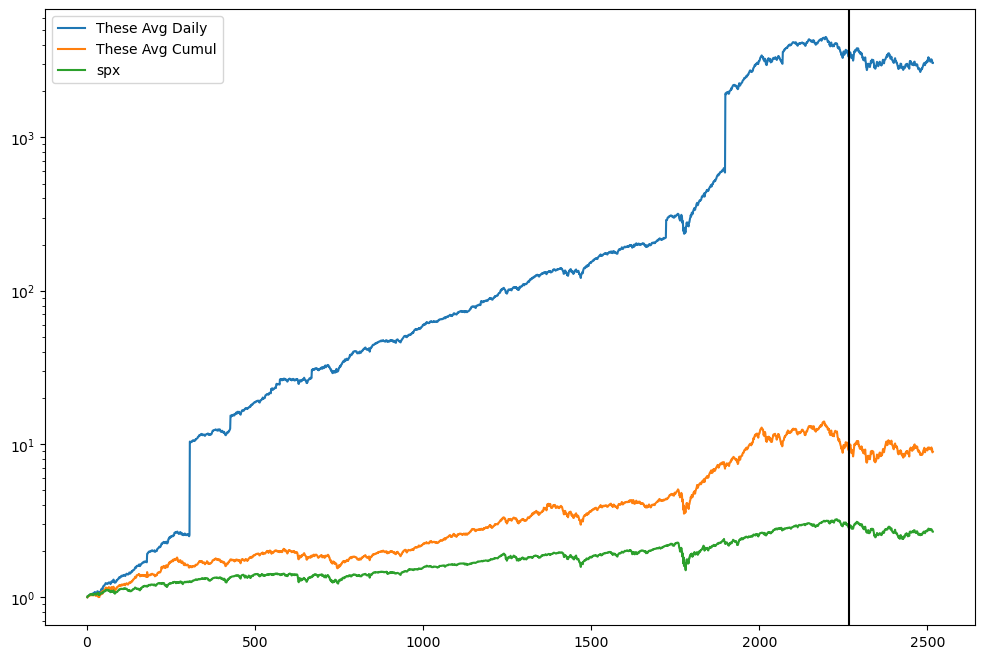

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(
    data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
    label='These Avg Daily')
plt.plot(
    data['DayToDayChange'].cumprod().mean(axis=1),
    label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2013-02-25,NaN,NaN
1,2013-02-26,1.001890,1.001890
2,2013-02-27,1.018160,1.014349
3,2013-02-28,1.019228,1.015217
4,2013-03-01,1.025584,1.021860


In [10]:
out.tail()

,Date,mine1,mine2
2512,2023-02-15,3227.752989,9.507319
2513,2023-02-16,3172.342062,9.248821
2514,2023-02-17,3149.562115,9.244004
2515,2023-02-21,3051.221428,8.826033
2516,2023-02-22,3051.989505,8.902052


In [11]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

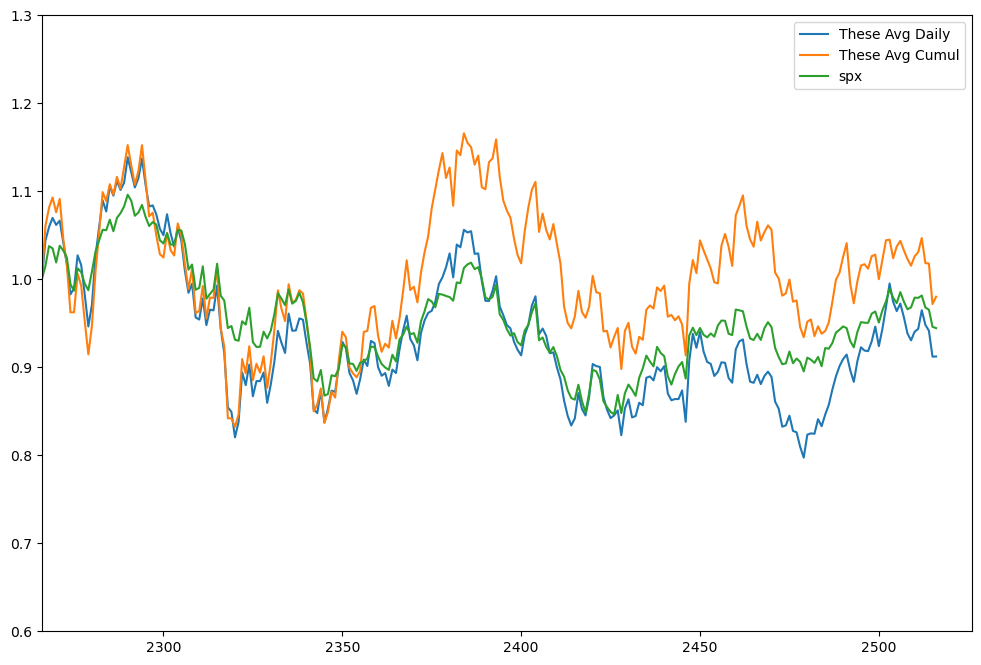

In [12]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.6, 1.3)
plt.legend();

In [13]:
def get_stock_data(stock, data, n_days=60):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()].index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [14]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [15]:
#rblx = get_stock_data('SE', data)
#rblx.head()

In [16]:
#rblx = rblx[['Value', 'Close', 'High', 'Low']]
#rblx.head()

In [17]:
#rblx['NextHigh'] = rblx.High.shift(-1)
#rblx['NextLow'] = rblx.Low.shift(-1)
#rblx['HighMult'] = rblx.NextHigh / rblx.Close
#rblx['LowMult'] = rblx.NextLow / rblx.Close
#rblx.head()

In [18]:
# For selling:
#high_05 = rblx.HighMult.quantile(q=[0.05])
#print(high_05)
#plt.hist(rblx.HighMult)
#plt.axvline(x=high_05[0.05], color='red');

In [19]:
# For buying:
#low_95 = rblx.LowMult.quantile(q=[0.95])
#print(low_95.tolist()[0])
#plt.hist(rblx.LowMult)
#plt.axvline(x=low_95[0.95], color='red');

In [20]:
#get_hilo_mult(rblx), get_hilo_mult(rblx, ci=0.5)

In [21]:
#aapl = get_stock_data('AAPL', data)
#get_hilo_mult(aapl), get_hilo_mult(aapl, ci=0.5)

In [22]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [23]:
#rblx['Trend'] = get_macd(rblx)
#rblx.head()

In [24]:
np.linspace(0.5, 0.95, 5)

array([0.5   , 0.6125, 0.725 , 0.8375, 0.95  ])

In [25]:
CIS = [0.3, 0.4, 0.5, 0.61, 0.73, 0.84, 0.95]

In [26]:
def get_hilo_mults(stock, cis=CIS):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    buy_pts_up = upward.LowMult.quantile(q=cis).tolist()
    sell_pts_up = (
        upward.HighMult.quantile(q=[1 - ci for ci in cis]).tolist())
    buy_pts_down = downward.LowMult.quantile(q=cis).tolist()
    sell_pts_down = (
        downward.HighMult.quantile(q=[1 - ci for ci in cis]).tolist())
    return buy_pts_up + sell_pts_up + buy_pts_down + sell_pts_down

In [27]:
#get_hilo_mults(aapl)

In [28]:
columns = [
    f'{bs}_pt_{ud}_p{int(100*p)}' 
    for ud in ['up', 'down']
    for bs in ['buy', 'sell'] 
    for p in CIS]
#columns

In [29]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock'] + columns)
df.head()

,stock,buy_pt_up_p30,buy_pt_up_p40,buy_pt_up_p50,buy_pt_up_p61,buy_pt_up_p73,buy_pt_up_p84,buy_pt_up_p95,sell_pt_up_p30,sell_pt_up_p40,...,buy_pt_down_p73,buy_pt_down_p84,buy_pt_down_p95,sell_pt_down_p30,sell_pt_down_p40,sell_pt_down_p50,sell_pt_down_p61,sell_pt_down_p73,sell_pt_down_p84,sell_pt_down_p95
0,AAPL,0.982065,0.986883,0.989350,0.991448,0.993829,0.995842,1.000250,1.018774,1.015864,...,0.997260,0.999722,1.002940,1.020253,1.012219,1.008303,1.007081,1.004230,1.001817,0.991301
1,ABMD,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000414,1.000500,1.000000,...,1.000000,1.000000,1.000074,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,ABNB,0.973303,0.977472,0.984132,0.988710,0.992335,1.001878,1.013803,1.036949,1.024300,...,0.988804,0.999326,1.003481,1.024693,1.019619,1.013305,1.009471,1.007454,0.999301,0.987185
3,ACN,0.980278,0.983919,0.987327,0.990871,0.996272,0.999220,1.002859,1.015578,1.012672,...,0.994511,1.000745,1.009134,1.024869,1.015219,1.007365,1.000654,0.998708,0.994565,0.986811
4,ADBE,0.978774,0.982497,0.984706,0.990059,0.992925,0.999732,1.001823,1.019606,1.014632,...,0.997091,1.005114,1.018822,1.030118,1.021689,1.018662,1.010527,1.003539,1.000019,0.988890


In [30]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,148.910004,AAPL
ABMD,NaN,ABMD
ABNB,127.209999,ABNB
ACN,269.630005,ACN
ADBE,348.720001,ADBE
...,...,...
ZM,73.389999,ZM
ZYXI,12.54,ZYXI
^GSPC,3991.050049,^GSPC
^IXIC,11507.070312,^IXIC


In [31]:
prices = df.merge(price, how='left', on='stock')
prices.head()

,stock,buy_pt_up_p30,buy_pt_up_p40,buy_pt_up_p50,buy_pt_up_p61,buy_pt_up_p73,buy_pt_up_p84,buy_pt_up_p95,sell_pt_up_p30,sell_pt_up_p40,...,buy_pt_down_p84,buy_pt_down_p95,sell_pt_down_p30,sell_pt_down_p40,sell_pt_down_p50,sell_pt_down_p61,sell_pt_down_p73,sell_pt_down_p84,sell_pt_down_p95,price
0,AAPL,0.982065,0.986883,0.989350,0.991448,0.993829,0.995842,1.000250,1.018774,1.015864,...,0.999722,1.002940,1.020253,1.012219,1.008303,1.007081,1.004230,1.001817,0.991301,148.910004
1,ABMD,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000414,1.000500,1.000000,...,1.000000,1.000074,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
2,ABNB,0.973303,0.977472,0.984132,0.988710,0.992335,1.001878,1.013803,1.036949,1.024300,...,0.999326,1.003481,1.024693,1.019619,1.013305,1.009471,1.007454,0.999301,0.987185,127.209999
3,ACN,0.980278,0.983919,0.987327,0.990871,0.996272,0.999220,1.002859,1.015578,1.012672,...,1.000745,1.009134,1.024869,1.015219,1.007365,1.000654,0.998708,0.994565,0.986811,269.630005
4,ADBE,0.978774,0.982497,0.984706,0.990059,0.992925,0.999732,1.001823,1.019606,1.014632,...,1.005114,1.018822,1.030118,1.021689,1.018662,1.010527,1.003539,1.000019,0.988890,348.720001


In [32]:
def round_if_float(x):
    if np.isnan(x):
        return -1
    return round(x, 2)

In [33]:
for col in list(prices):
    if col.startswith('buy') or col.startswith('sell'):
        prices[col] *= prices.price
    if col != 'stock':
        prices[col] = prices[col].apply(round_if_float)
prices.set_index('stock', inplace=True)
prices.drop(INDICES, inplace=True)
prices.tail()

,buy_pt_up_p30,buy_pt_up_p40,buy_pt_up_p50,buy_pt_up_p61,buy_pt_up_p73,buy_pt_up_p84,buy_pt_up_p95,sell_pt_up_p30,sell_pt_up_p40,sell_pt_up_p50,...,buy_pt_down_p84,buy_pt_down_p95,sell_pt_down_p30,sell_pt_down_p40,sell_pt_down_p50,sell_pt_down_p61,sell_pt_down_p73,sell_pt_down_p84,sell_pt_down_p95,price
stock,,,,,,,,,,,,,,,,,,,,,
XPEV,8.50,8.58,8.78,8.90,9.04,9.23,9.36,10.03,9.74,9.47,...,9.27,9.40,9.74,9.65,9.46,9.36,9.25,9.20,9.06,9.21
ZBRA,297.45,298.70,299.66,302.23,303.87,305.22,307.59,312.29,311.34,308.78,...,303.58,305.99,312.97,310.12,309.45,308.32,306.49,304.64,301.25,304.87
ZEST,0.19,0.19,0.19,0.20,0.20,0.20,0.21,0.23,0.23,0.22,...,0.21,0.21,0.24,0.23,0.23,0.22,0.22,0.21,0.21,0.21
ZM,70.72,71.15,71.56,72.14,72.40,72.79,74.06,75.66,74.91,74.60,...,72.82,73.55,75.10,74.89,74.59,74.24,73.80,73.42,72.60,73.39
ZYXI,12.22,12.31,12.35,12.39,12.42,12.48,12.53,12.86,12.84,12.80,...,12.47,12.55,12.92,12.84,12.83,12.76,12.69,12.61,12.56,12.54


In [34]:
prices.to_csv('mults.csv')
!open ./mults.csv